In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Data
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [112]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [113]:
df.shape

(1338, 7)

In [114]:
df.sample(8)

,age,sex,bmi,children,smoker,region,charges
950,57,male,18.335,0,no,northeast,11534.87265
13,56,female,39.820,0,no,southeast,11090.71780
941,50,female,46.090,1,no,southeast,9549.56510
1171,43,female,26.700,2,yes,southwest,22478.60000
117,29,female,27.940,1,yes,southeast,19107.77960
659,57,female,28.785,4,no,northeast,14394.39815
74,44,male,27.400,2,no,southwest,7726.85400
1066,48,male,37.290,2,no,southeast,8978.18510


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [117]:
df = df.drop_duplicates()

In [118]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [119]:
# Label Encoding
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [120]:
X = df.drop('charges', axis=1)  # Features
y = df['charges']                # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


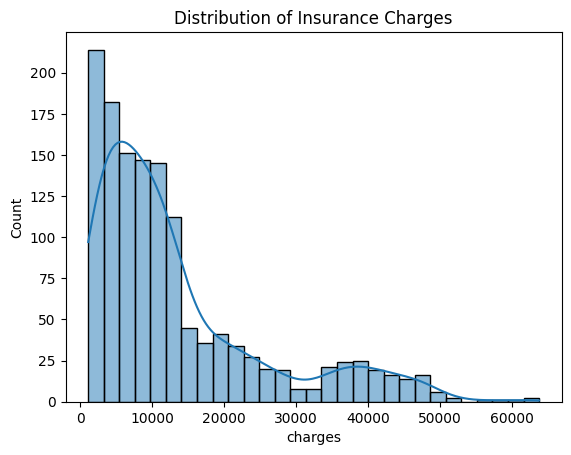

In [122]:
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

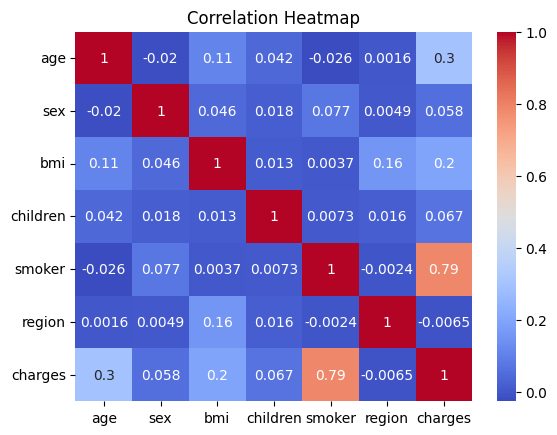

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

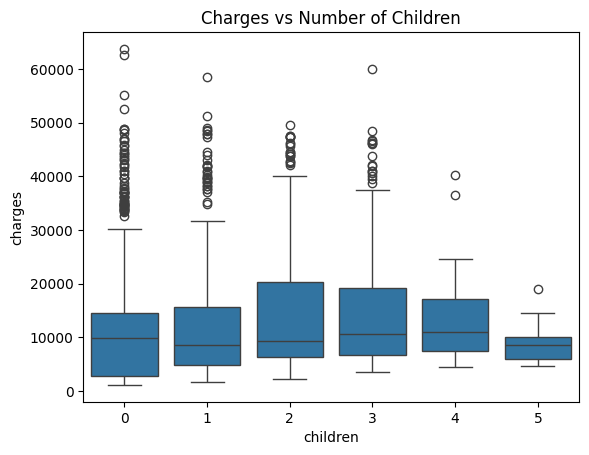

In [124]:
sns.boxplot(x="children", y="charges", data=df)
plt.title("Charges vs Number of Children")
plt.show()

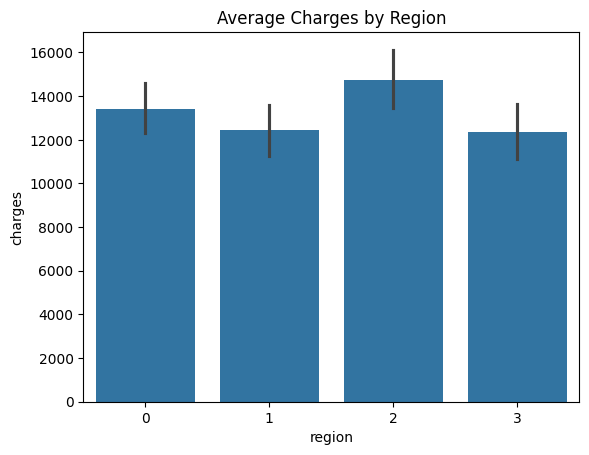

In [125]:
sns.barplot(x="region", y="charges", data=df)
plt.title("Average Charges by Region")
plt.show()

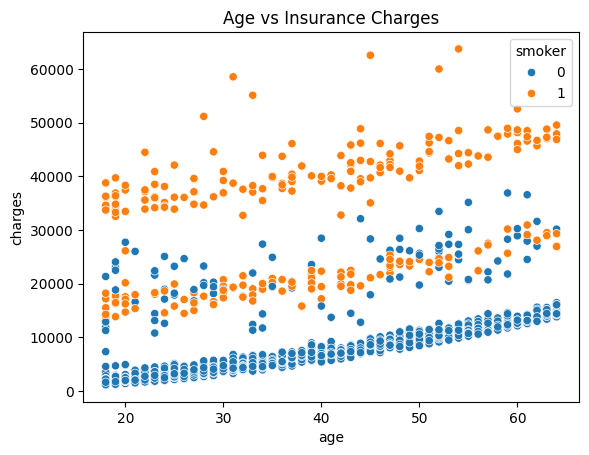

In [126]:
sns.scatterplot(x="age", y="charges", data=df, hue="smoker")
plt.title("Age vs Insurance Charges")
plt.show()

In [127]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Model Accuracy (R² Score):", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Model Accuracy (R² Score): 0.8068466322629111
Mean Absolute Error: 4182.353155288297
Mean Squared Error: 35493102.61165053


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn. model_selection import train_test_split

In [129]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [130]:
from sklearn.preprocessing import LabelEncoder

# Columns that contain text values
categorical_cols = ['sex', 'smoker', 'region']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [131]:
x = df.drop(columns = "age")
y = df["age"]

In [132]:
x.head()

,sex,bmi,children,smoker,region,charges
0,0,27.900,0,1,3,16884.92400
1,1,33.770,1,0,2,1725.55230
2,1,33.000,3,0,2,4449.46200
3,1,22.705,0,0,1,21984.47061
4,1,28.880,0,0,1,3866.85520


In [133]:
#encoder LeaveOnehotencoder
import category_encoders as ce 
encoder = ce.LeaveOneOutEncoder(return_df=True)
x = encoder.fit_transform(x , y)

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [135]:
x_df = pd.DataFrame(x)

In [136]:
x_df.head()

,0,1,2,3,4,5
0,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [137]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [138]:
x_train.shape, y_test.shape

((1069, 6), (268,))

In [139]:
model_rfr = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
#model_xgb = XGBRegressor(Objective = "reg : squarederror")

models = [model_rfr, model_dt, model_lr]

In [140]:
#fitting data in all three models
for model in models:

    print(f"Training {model}")
    model.fit(x_train, y_train)

Training RandomForestRegressor()
Training DecisionTreeRegressor()
Training LinearRegression()


In [141]:
for model in models:
    print(f"score of {model} is : {model.score(x_test, y_test)}")

score of RandomForestRegressor() is : 0.8473106875986325
score of DecisionTreeRegressor() is : 0.7153686597814715
score of LinearRegression() is : 0.314551760560584


In [142]:
import pickle

#save model
pickle.dump(model_rfr, open("insurance_model.pkl", "wb"))

#save encoder
pickle.dump(encoder, open('encoder.pkl', "wb"))

#save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

print(" Model, encoder & scaler saved succesfully")

 Model, encoder & scaler saved succesfully


In [ ]:
# age, sex(1=male,0=female), bmi, children, smoker(1=yes,0=no), region(0-3)
sample = [[28, 1, 26.5, 2, 1, 2]]  

predicted_price = model.predict(sample)
print("Predicted Medical Insurance Cost:", round(predicted_price[0]))

Predicted Medical Insurance Cost: 88


In [ ]:
# Format: [age, sex, bmi, children, smoker, region]
# sex: male=1, female=0
# smoker: yes=1, no=0
# region: northeast=0, northwest=1, southeast=2, southwest=3

user_data = [[30, 1, 28.5, 2, 1, 2]]  

prediction = model.predict(user_data)
print("Predicted Insurance Premium: ₹", prediction[0])

Predicted Insurance Premium: ₹ 86.87170137874466
